### Indian kid Screen time 
### Introduction 
The dataset here contains the screen time patterns of 9712 Indian children aged 8 to 18 years, built using real-world trends.It is from the Scientific studies conducted in India between 2023–2024. It combines urban and rural demographics, reflecting differences in device access, screen habits, and health outcomes. In 2025, screen time among Indian children has reached new heights, influenced by the rise of digital learning, social media, and entertainment apps. This report delves into the average daily screen usage by age group, regional variations, and the types of content most consumed by kids. It also highlights concerns raised by parents and experts around mental health, physical activity, and academic performance. As India continues its digital transformation, understanding and managing children's screen habits is more important than ever.
Objective:
Analyze the dataset to understand patterns in screen time usage, devices, health impacts, and related behaviors.

Tasks to be performed:
Data Loading & Inspection : Load the dataset and check dimensions, data types, and sample rows. Identify missing values and duplicate records.

Data Cleaning: Strip extra spaces from column names.

Handle missing values appropriately.

Visualization
Use histograms, bar plots, and scatter plots to illustrate findings.

Apply consistent formatting and labeling for readability.

Key focuses:
Urban vs. rural locations.

Device preferences (smartphones, TVs, laptops).

Average screen time across age groups and genders.

Explore the relationship between daily screen time and sleep hours. Relationship between Health impacts (poor sleep, anxiety, eye strain) and child's average daily screen time .


### Import Libraries and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv(r'D:\Data Science\Portfolio\Indian_Kids_Screen_Time.csv')

### Read data set and overview 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [4]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [5]:
df.shape

(9712, 8)

In [6]:
df.describe ().T

,count,mean,std,min,25%,50%,75%,max
Age,9712.0,12.979201,3.162437,8.0,10.00,13.00,16.00,18.00
Avg_Daily_Screen_Time_hr,9712.0,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Educational_to_Recreational_Ratio,9712.0,0.427226,0.073221,0.3,0.37,0.43,0.48,0.60


### Data cleaning

In [7]:
## check missing values
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [8]:
## check for duplicate
df.duplicated().sum()

44

In [9]:
## Remove duplicate
df=df.drop_duplicates()
df.shape

(9668, 8)

In [10]:
df['Health_Impacts'] = df['Health_Impacts'].fillna(df['Health_Impacts'].mode()[0])
df.isna().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

### Analysis and Visualization

In [11]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [12]:
count=df['Urban_or_Rural'].value_counts()
count

Urban_or_Rural
Urban    6810
Rural    2858
Name: count, dtype: int64

####  Urban vs Rural comparison

Text(0, 0.5, 'Counts')

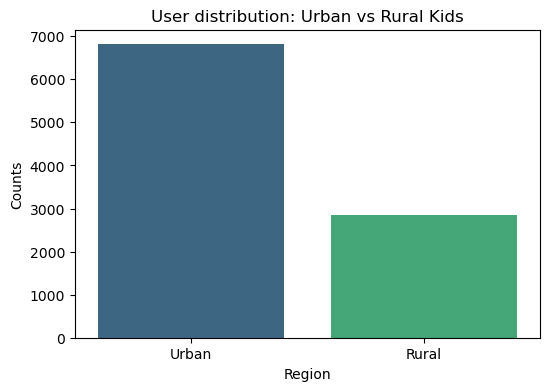

In [52]:
### 1. Distribution of total user in urban and Rural
col = 'Urban_or_Rural'
plt.figure(figsize=(6,4))
counts = df[col].value_counts(dropna=False)
Urban_or_Rural = sns.barplot (x=counts.index, y=counts.values, palette='viridis')
plt.title('User distribution: Urban vs Rural Kids')
plt.xlabel('Region')
plt.ylabel('Counts')

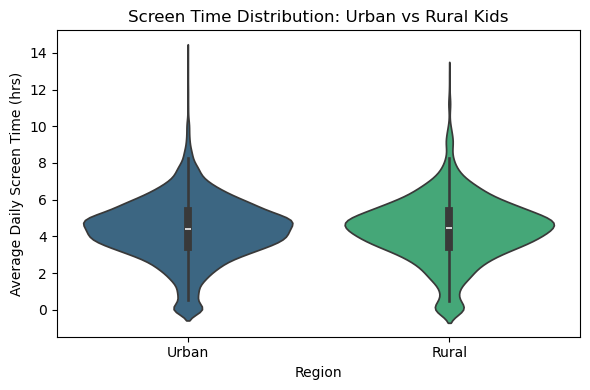

In [36]:
#### 2.  Comparison of avg screen time of urban and Rural
plt.figure(figsize=(6,4))
Urban_and_Rural = sns.violinplot (x='Urban_or_Rural', y= 'Avg_Daily_Screen_Time_hr', data=df, palette='viridis')
plt.title('Screen Time Distribution: Urban vs Rural Kids')
plt.xlabel('Region')
plt.ylabel('Average Daily Screen Time (hrs)')
plt.tight_layout()
plt.show()


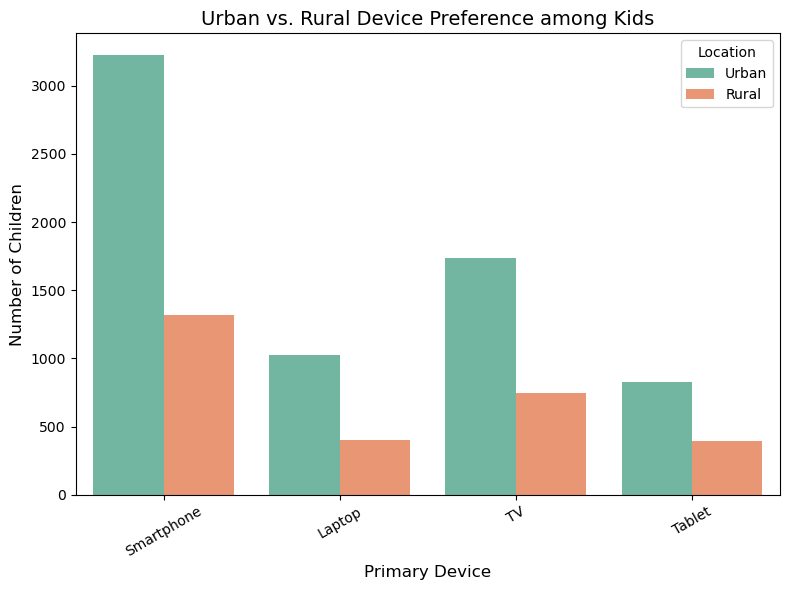

In [37]:
#### 3.Urban vs. Rural device preference differences

# Group by Urban/Rural and Primary Device  
device_pref = (df.groupby(['Urban_or_Rural','Primary_Device']).size().reset_index(name='count'))

## Plot the data with device preferences 

plt.figure(figsize=(8,6))
sns.countplot(data=df,x="Primary_Device",hue="Urban_or_Rural", palette="Set2")
plt.title("Urban vs. Rural Device Preference among Kids", fontsize=14)
plt.xlabel("Primary Device", fontsize=12)
plt.ylabel("Number of Children", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Location")
plt.tight_layout()
plt.show()


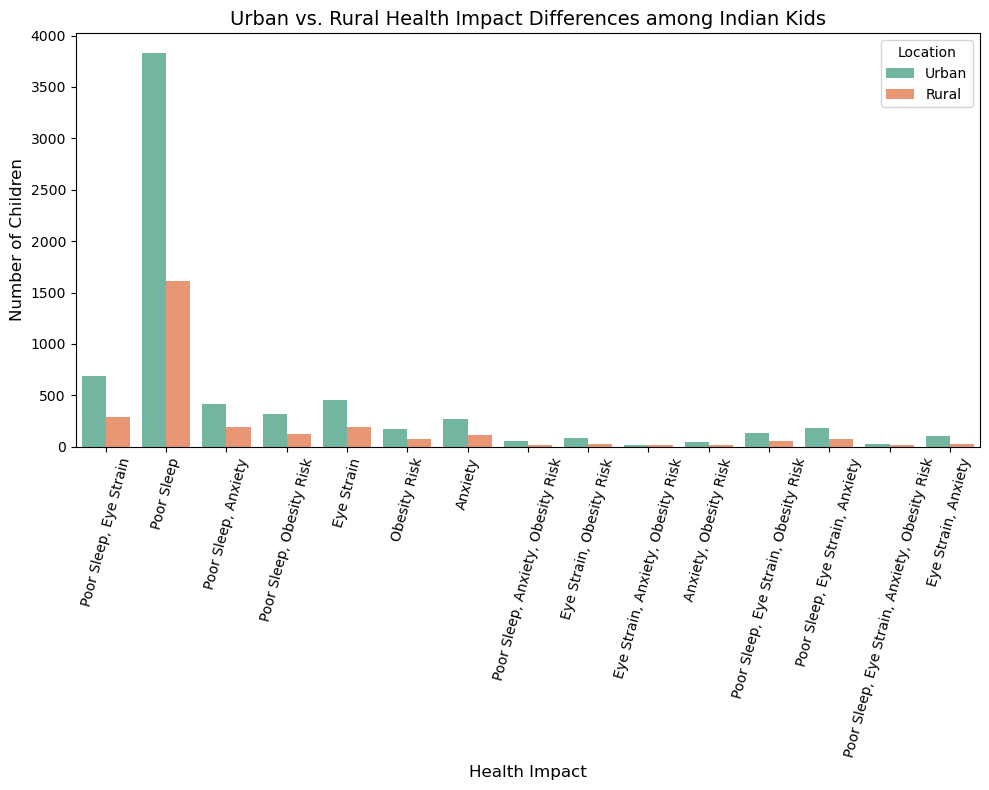

In [39]:
#### 4.Urban vs. Rural health impact diferences

plt.figure(figsize=(10,8))
sns.countplot( data=df, x="Health_Impacts",hue="Urban_or_Rural", palette="Set2")
plt.title("Urban vs. Rural Health Impact Differences among Indian Kids", fontsize=14)
plt.xlabel("Health Impact", fontsize=12)
plt.ylabel("Number of Children", fontsize=12)
plt.xticks(rotation=75)
plt.legend(title="Location")
plt.tight_layout()
plt.show()

#### Device Preference

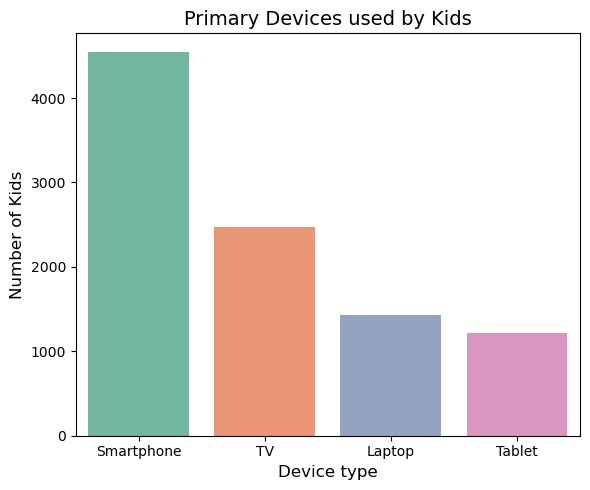

In [95]:
### 1.Count/percentage of children using smartphones, TVs, laptops.
plt.figure(figsize=(6,5))
sns.countplot (data=df, x='Primary_Device', order=df['Primary_Device'].value_counts().index, palette='Set2')
plt.title('Primary Devices used by Kids', fontsize=14)
plt.xlabel('Device type', fontsize =12)
plt.ylabel('Number of Kids', fontsize =12)
plt.tight_layout()
plt.show()

In [56]:
### 2. Cross-tab of device preferences with Gender and Age 
# Create age group
bins =  [8,12,15,18]
labels = ['8-12', '13-15', '16-18']
df['Age_group'] = pd.cut(df['Age'],bins=bins, labels=labels, right=True,include_lowest=True)

#cross-tab: count of primary device by gender & age_group
crosstab = pd.crosstab(index=[df['Gender'], df['Age_group']],columns=df['Primary_Device'])
print("\nDevice preference cross-tab (Gender x Age_Group):\n")
print(crosstab)


Device preference cross-tab (Gender x Age_Group):

Primary_Device    Laptop  Smartphone   TV  Tablet
Gender Age_group                                 
Female 8-12          208         926  673     336
       13-15         274         645  282     141
       16-18         257         630  258     110
Male   8-12          173         971  704     377
       13-15         267         671  266     123
       16-18         252         697  295     132


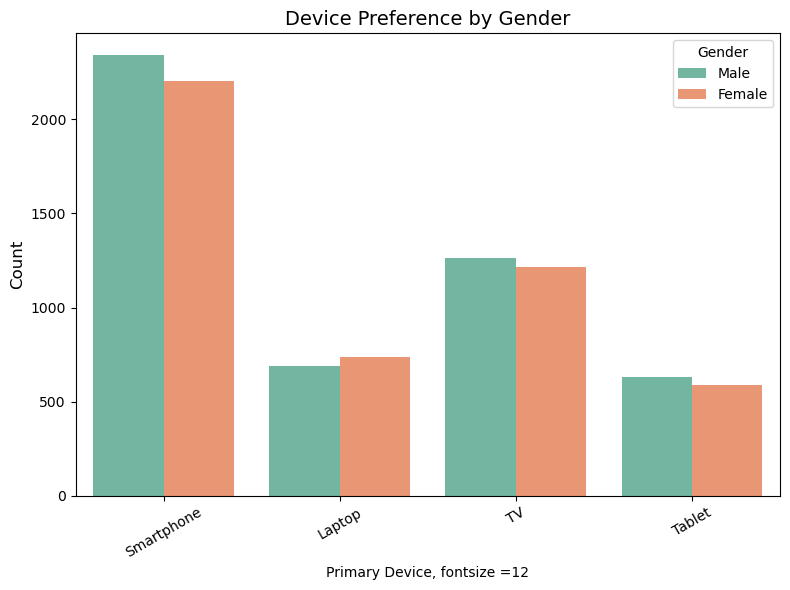

In [64]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Primary_Device',hue='Gender',palette='Set2')
plt.title('Device Preference by Gender', fontsize =14)
plt.xlabel('Primary Device, fontsize =12')
plt.ylabel('Count', fontsize =12)
plt.xticks(rotation=30)
plt.legend(title ='Gender')
plt.tight_layout()
plt.show()

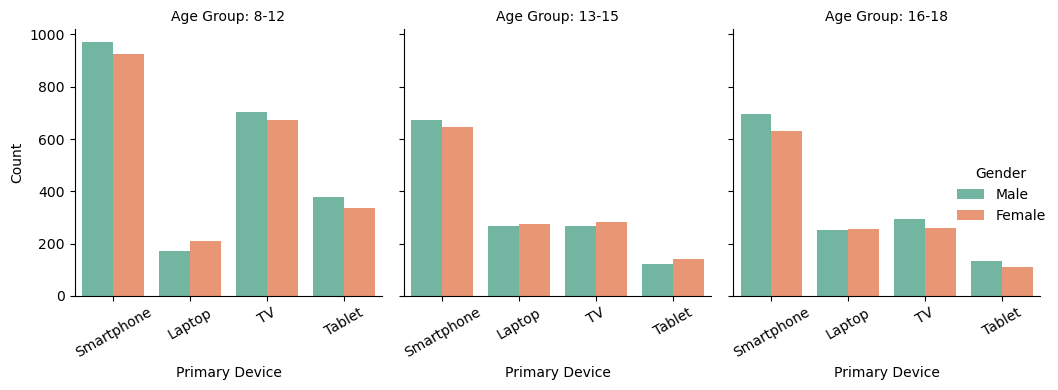

In [72]:
## Now split further by age group (facet grid) 
g = sns.catplot(data =df, x='Primary_Device', hue='Gender', col='Age_group', kind='count', palette='Set2', height =4, aspect=0.8)
g.set_titles('Age Group: {col_name}')
g.set_axis_labels('Primary Device', 'Count')
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()


#### Average daily screen time 

In [78]:
### 1. compare the Average screen time by age group

avg_screen_time_age = df.groupby('Age_group')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
avg_screen_time_age

,Age_group,Avg_Daily_Screen_Time_hr
0,8-12,4.193420
1,13-15,4.486276
2,16-18,4.537047


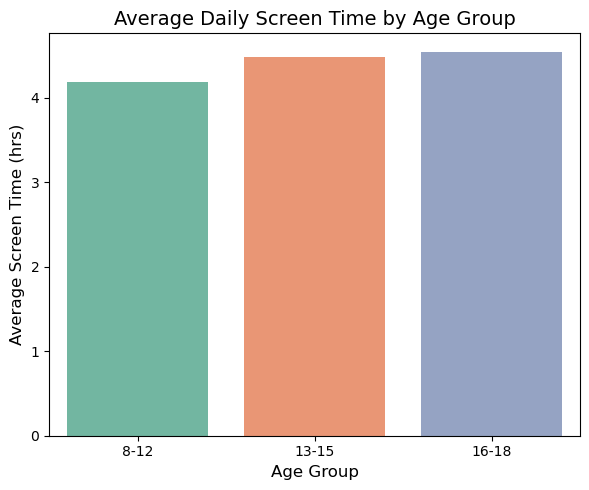

In [97]:
plt.figure(figsize=(6,5))

avg_screen_time = sns.barplot (x='Age_group', y= 'Avg_Daily_Screen_Time_hr', data=avg_screen_time_age, palette='Set2')
plt.title('Average Daily Screen Time by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Screen Time (hrs)', fontsize=12)
plt.tight_layout()
plt.show()

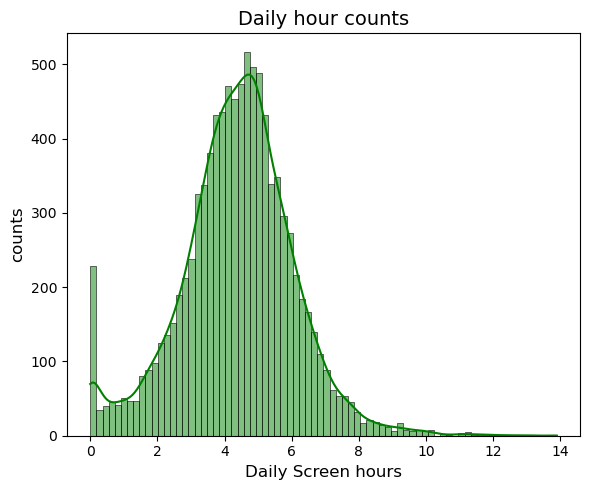

In [96]:
### 2. distribution of daily screentime 
plt.figure(figsize=(6,5))
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', kde=True, color='green' )
plt.xlabel('Daily Screen hours', fontsize=12)
plt.ylabel('counts', fontsize=12)
plt.title('Daily hour counts', fontsize=14)
plt.tight_layout()
plt.show()

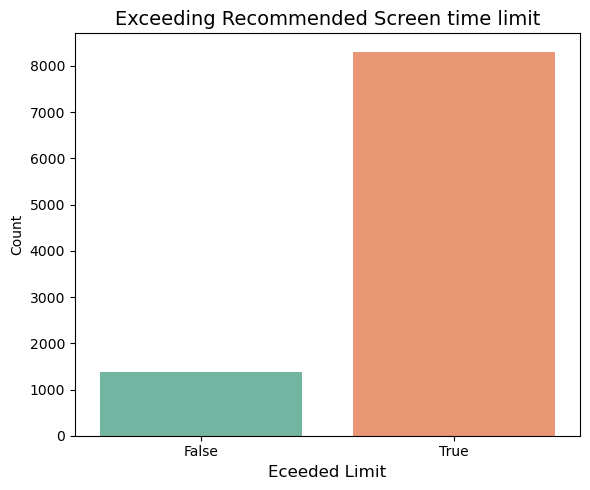

In [99]:
### 3. Exceeded recommended screen limit (yes/no)

plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Exceeded_Recommended_Limit', palette='Set2')
plt.title('Exceeding Recommended Screen time limit', fontsize = 14)
plt.xlabel('Eceeded Limit', fontsize =12)
plt.ylabel ('Count')
plt.tight_layout()
plt.show()

#### Health impacts with Screen time

In [135]:
topimpacts = df['Health_Impacts'].value_counts().head(20)
topimpacts

Health_Impacts
Poor Sleep                                       5444
Poor Sleep, Eye Strain                            978
Eye Strain                                        644
Poor Sleep, Anxiety                               607
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

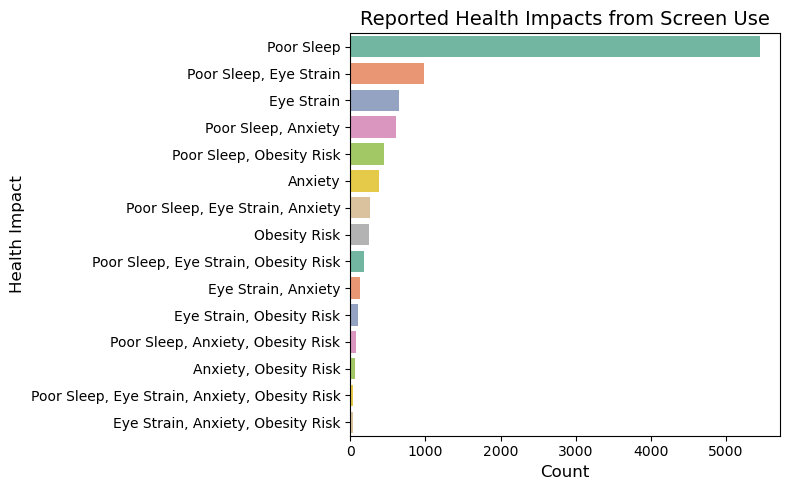

In [164]:
###1. Helth Impacts distributions 
plt.figure(figsize=(8,5))
sns.countplot(y='Health_Impacts', data=df,order =df['Health_Impacts'].value_counts().index, palette='Set2')
plt.title('Reported Health Impacts from Screen Use', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Health Impact', fontsize=12)
plt.tight_layout()
plt.show()

In [165]:
df.Health_Impacts.unique() ## separte the unique value

array(['Poor Sleep, Eye Strain', 'Poor Sleep', 'Poor Sleep, Anxiety',
       'Poor Sleep, Obesity Risk', 'Eye Strain', 'Obesity Risk',
       'Anxiety', 'Poor Sleep, Anxiety, Obesity Risk',
       'Eye Strain, Obesity Risk', 'Eye Strain, Anxiety, Obesity Risk',
       'Anxiety, Obesity Risk', 'Poor Sleep, Eye Strain, Obesity Risk',
       'Poor Sleep, Eye Strain, Anxiety',
       'Poor Sleep, Eye Strain, Anxiety, Obesity Risk',
       'Eye Strain, Anxiety'], dtype=object)

In [178]:
##Create unique health impact lists 
health_impacts={
    'Poor Sleep': df['Health_Impacts'].str.contains('Poor Sleep').sum(),
    'Eye Strain': df['Health_Impacts'].str.contains('Eye Strain').sum(),
    'Anxiety': df['Health_Impacts'].str.contains('Anxiety').sum(),
    'Obesity Risk': df['Health_Impacts'].str.contains('Obesity Risk').sum()

}
health_impacts

{'Poor Sleep': 8042, 'Eye Strain': 2381, 'Anxiety': 1604, 'Obesity Risk': 1217}

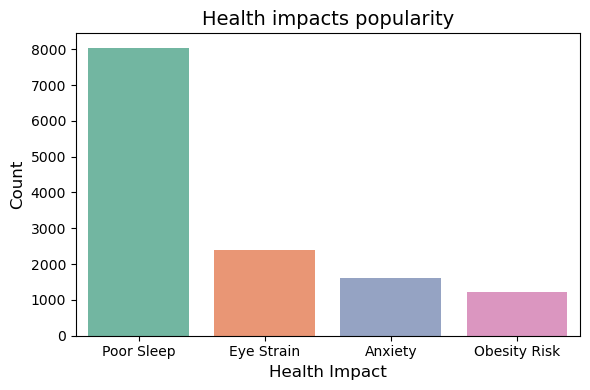

In [189]:
### 2. Helth Impacts popularity

plt.figure(figsize=(6,4))
sns.barplot(x=health_impacts.keys(), y= health_impacts.values(), palette='Set2')
plt.title('Health impacts popularity', fontsize=14)
plt.xlabel('Health Impact', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

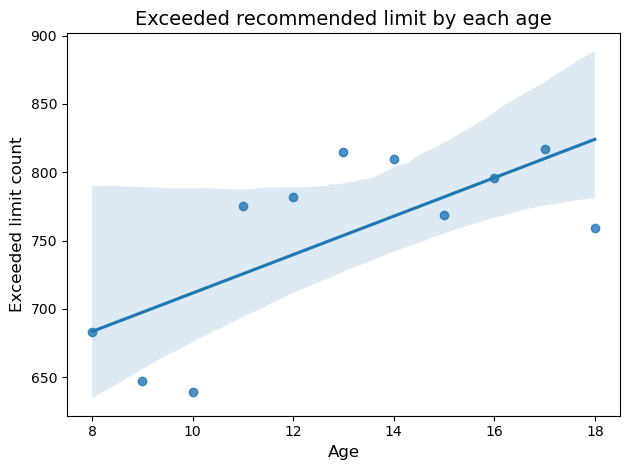

In [194]:
## 3. Limit exceeded by age 

Age_Exeeded_limit = df.groupby('Age')['Exceeded_Recommended_Limit'].sum()

sns.regplot(x= Age_Exeeded_limit.index, y= Age_Exeeded_limit.values)

plt.xlabel('Age', fontsize=12)
plt.ylabel("Exceeded limit count", fontsize=12)
plt.title('Exceeded recommended limit by each age', fontsize=14)
plt.tight_layout()
plt.show()



### Predictive Modeling